In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
#load dataset
data = pd.read_csv("database/te-k/data.csv", delimiter="|")

# print 
data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [3]:
# rename column name
data = data.rename(columns={"legitimate":"label"})

# remove md5 and name of the program
data = data.drop(["Name"], axis=1)
data = data.drop(["md5"], axis=1)

# set malware (1), benign (0)
data['label'] = data['label'].replace(0,"S")
data['label'] = data['label'].replace(1,0)
data['label'] = data['label'].replace("S",1)
data

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,label
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,0
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,0
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,0
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,0
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,1
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,1
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,1
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,1


<br><br>

Make train and test dataset.

In [13]:
# make train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"], test_size=0.3, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/tek_train_70.csv", index=False)
X_test.to_csv("database/tek_test_30.csv", index=False)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96632 entries, 125002 to 121958
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Machine                      96632 non-null  int64  
 1   SizeOfOptionalHeader         96632 non-null  int64  
 2   Characteristics              96632 non-null  int64  
 3   MajorLinkerVersion           96632 non-null  int64  
 4   MinorLinkerVersion           96632 non-null  int64  
 5   SizeOfCode                   96632 non-null  int64  
 6   SizeOfInitializedData        96632 non-null  int64  
 7   SizeOfUninitializedData      96632 non-null  int64  
 8   AddressOfEntryPoint          96632 non-null  int64  
 9   BaseOfCode                   96632 non-null  int64  
 10  BaseOfData                   96632 non-null  int64  
 11  ImageBase                    96632 non-null  float64
 12  SectionAlignment             96632 non-null  int64  
 13  FileAlignm

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"], test_size=0.2, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/tek_train_80.csv", index=False)
X_test.to_csv("database/tek_test_20.csv", index=False)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110437 entries, 125264 to 121958
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Machine                      110437 non-null  int64  
 1   SizeOfOptionalHeader         110437 non-null  int64  
 2   Characteristics              110437 non-null  int64  
 3   MajorLinkerVersion           110437 non-null  int64  
 4   MinorLinkerVersion           110437 non-null  int64  
 5   SizeOfCode                   110437 non-null  int64  
 6   SizeOfInitializedData        110437 non-null  int64  
 7   SizeOfUninitializedData      110437 non-null  int64  
 8   AddressOfEntryPoint          110437 non-null  int64  
 9   BaseOfCode                   110437 non-null  int64  
 10  BaseOfData                   110437 non-null  int64  
 11  ImageBase                    110437 non-null  float64
 12  SectionAlignment             110437 non-null  int64  

<br><br>

Make folds.

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(data)
print(kf)

KFold(n_splits=3, random_state=42, shuffle=True)


In [16]:
train_folds = []
test_folds = []

for train_index, test_index in kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index))
    train_folds.append(data.iloc[train_index])
    test_folds.append(data.iloc[test_index])

TRAIN: [     1      2      5 ... 138043 138044 138045] TEST: [     0      3      4 ... 138038 138041 138046]
92031
TRAIN: [     0      2      3 ... 138040 138041 138046] TEST: [     1      6      7 ... 138043 138044 138045]
92031
TRAIN: [     0      1      3 ... 138044 138045 138046] TEST: [     2      5     10 ... 138037 138039 138040]
92032


In [17]:
train_folds[0].to_csv('database/tek_train_fold1.csv', index=False)
train_folds[1].to_csv('database/tek_train_fold2.csv', index=False)
train_folds[2].to_csv('database/tek_train_fold3.csv', index=False)

test_folds[0].to_csv('database/tek_test_fold1.csv', index=False)
test_folds[1].to_csv('database/tek_test_fold2.csv', index=False)
test_folds[2].to_csv('database/tek_test_fold3.csv', index=False)

<br><br><br><br>

## data analysis

In [4]:
print(data.shape)

(138047, 55)


In [5]:
data.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,label
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.700660
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,1.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [6]:
benign = data.loc[ data['label'] == 0, : ]
malware = data.loc[ data['label'] == 1, : ]

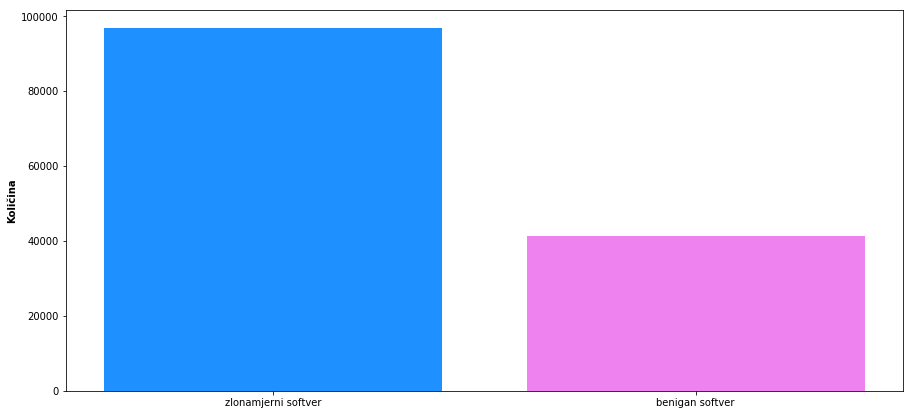

In [7]:
number_of_malicious = sum(data["label"])
number_of_benign = data.shape[0] - number_of_malicious

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(["zlonamjerni softver", "benigan softver"], [number_of_malicious, number_of_benign], color = ['dodgerblue', 'violet'])
plt.xticks(rotation='horizontal')
plt.ylabel('Količina', fontweight='bold')

plt.show()

In [8]:
print(abs(data.corrwith(data['label']).dropna()).sort_values()) 

AddressOfEntryPoint            0.000134
SectionMaxRawsize              0.000790
BaseOfData                     0.001136
SectionsMeanRawsize            0.001175
MinorSubsystemVersion          0.001213
SectionMaxVirtualsize          0.001332
MinorOperatingSystemVersion    0.001702
SectionsMeanVirtualsize        0.001734
ResourcesMinSize               0.001774
MajorOperatingSystemVersion    0.002402
SectionAlignment               0.002429
SizeOfHeapCommit               0.002506
SizeOfImage                    0.002603
LoaderFlags                    0.002649
SizeOfStackCommit              0.003226
NumberOfRvaAndSizes            0.003523
ResourcesMeanSize              0.003824
SizeOfUninitializedData        0.003997
SizeOfInitializedData          0.004958
ResourcesMaxSize               0.005529
BaseOfCode                     0.006232
ImageBase                      0.008245
SizeOfHeaders                  0.010125
LoadConfigurationSize          0.011666
MajorLinkerVersion             0.017320


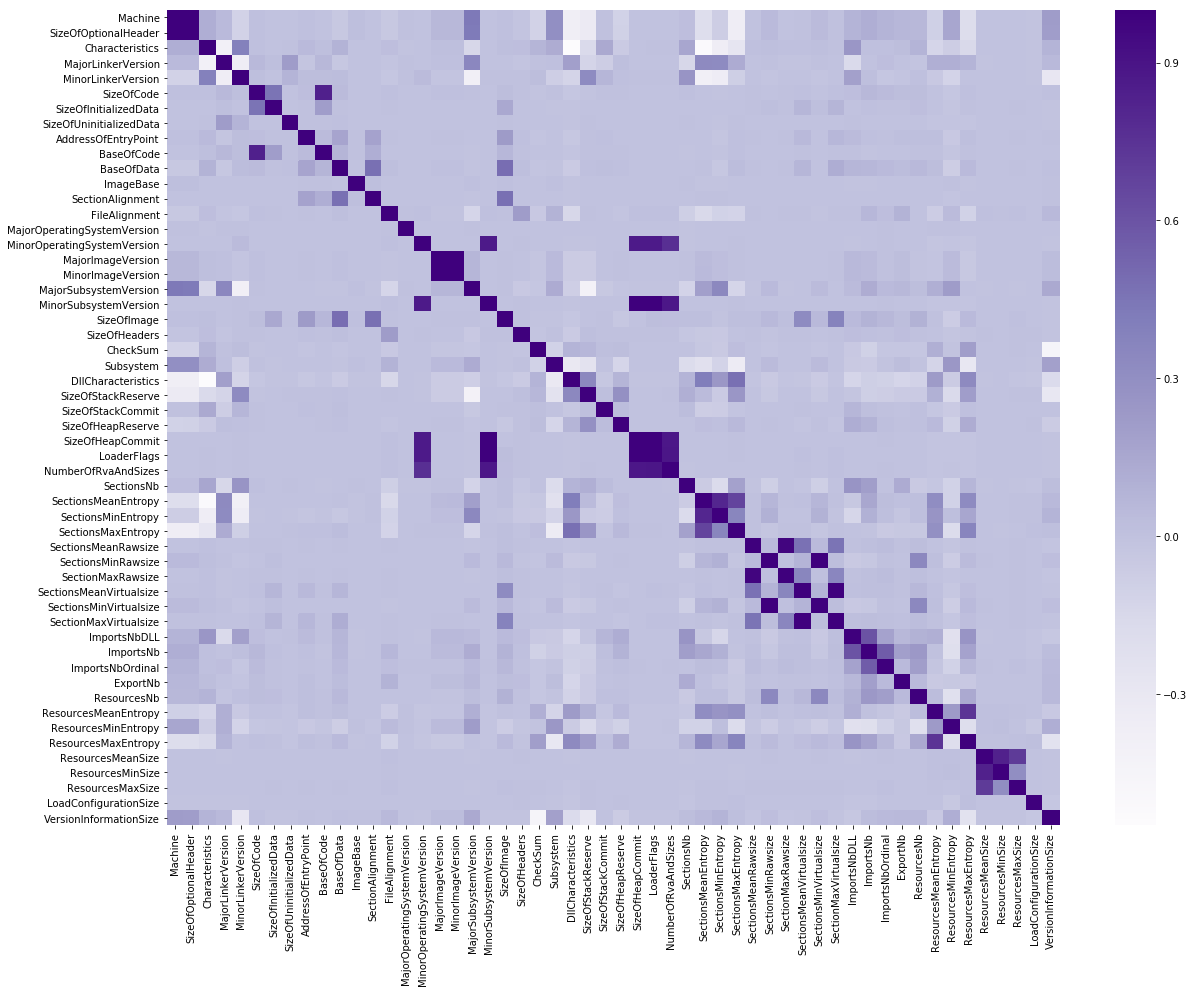

In [9]:
best_features_in_category_dataframe = pd.DataFrame()
index = 0

for features in data.columns:
    if (features == "label"):
        continue
    best_features_in_category_dataframe.insert(index, features, data[features])
    index = index + 1

plt.subplots(figsize=(20,15))
sn.heatmap(best_features_in_category_dataframe.corr(), cmap='Purples')

<br><br><br>

## feature selection

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [35]:
# 80 - 20

train80 = pd.read_csv("database/te-k/tek/0/tek_train_80.csv")
test80 = pd.read_csv("database/te-k/tek/0/tek_test_20.csv")

sel80 = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1))
sel80.fit(train80.drop(["label"], axis=1), train80["label"].values.ravel())

print(sum(sel80.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.6s finished


14


In [36]:
# only selected features
selected_features80 = pd.DataFrame(sel80.get_support())

selected_train80 = train80.drop(["label"], axis=1).loc[:,selected_features80.values.ravel()]
selected_train80["label"] = train80["label"]
selected_train80.to_csv("database/te-k/tek/0/tek_train_selected_80.csv", index=False)

selected_test80 = test80.drop(["label"], axis=1).loc[:,selected_features80.values.ravel()]
selected_test80["label"] = test80["label"]
selected_test80.to_csv("database/te-k/tek/0/tek_test_selected_20.csv", index=False)

print(selected_train80.columns.tolist())

['Characteristics', 'BaseOfData', 'ImageBase', 'MajorOperatingSystemVersion', 'MinorImageVersion', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SectionsMaxEntropy', 'ExportNb', 'ResourcesNb', 'ResourcesMinEntropy', 'ResourcesMinSize', 'VersionInformationSize', 'label']


In [37]:
# 70 - 30

train70 = pd.read_csv("database/te-k/tek/0/tek_train_70.csv")
test70 = pd.read_csv("database/te-k/tek/0/tek_test_30.csv")

sel70 = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1))
sel70.fit(train70.drop(["label"], axis=1), train70["label"].values.ravel())

print(sum(sel70.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.0s finished


14


In [38]:
# only selected features
selected_features70 = pd.DataFrame(sel70.get_support())

selected_train70 = train70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_train70["label"] = train70["label"]
selected_train70.to_csv("database/te-k/tek/0/tek_train_selected_70.csv", index=False)

selected_test70 = test70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_test70["label"] = test70["label"]
selected_test70.to_csv("database/te-k/tek/0/tek_test_selected_30.csv", index=False)

print(selected_train70.columns.tolist())

['Characteristics', 'BaseOfData', 'ImageBase', 'MajorOperatingSystemVersion', 'MinorImageVersion', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SectionsMaxEntropy', 'ExportNb', 'ResourcesNb', 'ResourcesMinEntropy', 'ResourcesMinSize', 'VersionInformationSize', 'label']


<br><br>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [33]:
# 80 - 20
rfecv_rf_ovo80 = RFECV(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1), 
                 step=1, 
                 cv=StratifiedKFold(n_splits=3),
                 scoring='roc_auc_ovo')

rfecv_rf_ovo80.fit(train80.drop(["label"], axis=1), train80["label"].values.ravel())

print(sum(rfecv_rf_ovo80.get_support()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parall

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parall

KeyboardInterrupt: 

In [ ]:
# only selected features
selected_features_rfecv80 = pd.DataFrame(rfecv_rf_ovo80.get_support())

selected_train_rfecv80 = train80.drop(["label"], axis=1).loc[:,selected_features_rfecv80.values.ravel()]
selected_train_rfecv80["label"] = train80["label"]
selected_train_rfecv80.to_csv("database/te-k/tek/0/tek_train_selected_rfecv_80.csv", index=False)

selected_test_rfecv80 = test80.drop(["label"], axis=1).loc[:,selected_features_rfecv80.values.ravel()]
selected_test_rfecv80["label"] = test80["label"]
selected_test_rfecv80.to_csv("database/te-k/tek/0/tek_test_selected_rfecv_20.csv", index=False)

print(selected_train_rfecv80.columns.tolist())

In [ ]:
# 70 - 30
rfecv_rf_ovo70 = RFECV(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1), 
                 step=1, 
                 cv=StratifiedKFold(n_splits=3),
                 scoring='roc_auc_ovo')

rfecv_rf_ovo70.fit(train70.drop(["label"], axis=1), train70["label"].values.ravel())

print(sum(rfecv_rf_ovo70.get_support()))

In [ ]:
# only selected features
selected_features_rfecv70 = pd.DataFrame(rfecv_rf_ovo70.get_support())

selected_train_rfecv70 = train70.drop(["label"], axis=1).loc[:,selected_features_rfecv70.values.ravel()]
selected_train_rfecv70["label"] = train70["label"]
selected_train_rfecv70.to_csv("database/te-k/tek/0/tek_train_selected_rfecv_70.csv", index=False)

selected_test_rfecv70 = test70.drop(["label"], axis=1).loc[:,selected_features70.values.ravel()]
selected_test_rfecv70["label"] = test70["label"]
selected_test_rfecv70.to_csv("database/te-k/tek/0/tek_test_selected_rfecv_30.csv", index=False)

print(selected_train70.columns.tolist())